In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import itertools
from matplotlib.colors import Normalize, LogNorm

sys.path.append("..")

In [2]:
from manage_data import get_conditions, load_result, delete_all, delete_result

In [3]:
df = load_result(conditions=get_conditions(
    N_particle = None,
    N_ensemble = None,
    velocity = None,
    Lambda = None,
    boundary = None,
    N_bins = None,
    gamma = None,
    slope = None,
    temperature = None,
    tau = None,
    Da = None,
    delta_t = None,
    initial = None,
    sampling = None
    )
)

df

,key,N_particle,N_ensemble,velocity,Lambda,boundary,N_bins,gamma,slope,temperature,tau,Da,delta_t,initial,sampling,average,std,time
182,db2a42,10000,100,1.0,0.01,5.0,40,1.0,0.01,1.0,5.0,5.0,0.01,10000,10000,"[-7.999999999999876e-06, 0.0009849999999999965...","[0.044783031786602784, 0.04474058308739442, 0....",4140.430580
235,4f1c1a,10000,100,1.0,0.01,5.0,40,1.0,0.02,1.0,5.0,5.0,0.01,10000,10000,"[-0.0007479999999999981, 0.0007779999999999967...","[0.09081101527898554, 0.08975653021368525, 0.0...",4135.676762
314,b1314a,10000,100,1.0,0.01,5.0,40,1.0,0.03,1.0,5.0,5.0,0.01,10000,10000,"[-0.001350000000000007, 0.0017850000000000006,...","[0.13530291016825946, 0.1344922442931153, 0.13...",4136.812451
279,2db1d5,10000,100,1.0,0.01,5.0,40,1.0,0.04,1.0,5.0,5.0,0.01,10000,10000,"[0.0006160000000000007, -0.0011679999999999954...","[0.17869823878259689, 0.17942284073104917, 0.1...",4134.360384
37,c31994,10000,100,1.0,0.01,5.0,40,1.0,0.05,1.0,5.0,5.0,0.01,10000,10000,"[-0.0003099999999999988, 0.0010300000000000233...","[0.224913102997574, 0.22304246030744593, 0.224...",4135.595332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,b8adcb,10000,100,1.0,0.07,5.0,40,1.0,0.16,1.0,5.0,5.0,0.01,10000,10000,"[0.0027999999999999965, 0.009584000000000021, ...","[1.888494808041615, 1.9035287617853447, 1.8814...",5130.145162
234,4e7f86,10000,100,1.0,0.07,5.0,40,1.0,0.17,1.0,5.0,5.0,0.01,10000,10000,"[0.0199070000000001, -0.00571199999999999, -0....","[2.0065948224170533, 2.0126856418865064, 1.999...",5125.884423
296,91e9e7,10000,100,1.0,0.07,5.0,40,1.0,0.18,1.0,5.0,5.0,0.01,10000,10000,"[0.022319999999999982, -0.018125999999999958, ...","[2.1150024817006696, 2.1369962021781728, 2.125...",5123.157410
82,037cdf,10000,100,1.0,0.07,5.0,40,1.0,0.19,1.0,5.0,5.0,0.01,10000,10000,"[0.0036480000000000167, 0.05403599999999989, -...","[2.204529245008115, 2.278325141568706, 2.25223...",5126.579491


In [4]:
# delete = df[df["size"] == 128]
delete = df
print(list(delete["key"]))
print(len(list(delete["key"])))
# delete_result(list(delete["key"]))

['db2a42', '4f1c1a', 'b1314a', '2db1d5', 'c31994', '8d9508', 'af8d03', 'c66e12', 'da7e2f', 'df7abe', '8d7265', '9a9384', '198b65', 'b05d8d', 'c72d2a', '873d9b', '4f3a24', '45ad95', 'f49a9a', 'da7ac5', '3c91e4', '546921', '16cb87', '6e0f5c', '8c4e54', 'fc5c62', '489eb8', 'e82d68', '017b26', '0d1ab9', '5136f3', '248904', '95a5ff', '61bc3b', '009a11', '970925', '401ca4', '2ebea8', '645874', 'fe7a83', 'e4ed75', 'fec158', '3845b2', 'b0c6cf', '94b547', '997cdf', 'f58fa4', 'f27346', '1a7db6', 'a96808', '603b46', 'e0185c', 'b45148', '8f199d', 'f5c4ec', '666564', 'ffbe21', '81cff2', '9e5ccb', 'd504f5', 'd32ced', '4e511e', '5b1660', '24f89a', '3e4761', '2ffee3', 'bec3de', 'af964c', 'c8fc55', '95c0ac', '3d01e0', 'a0d0c3', '3343a2', '187c40', 'c36446', '8622f8', 'e6bb0e', '6e70e1', '28207c', '295aa7', 'de07b2', '9451bc', '241cca', '74341f', '18a6be', '7ed050', 'f05e5f', '09e936', '879985', '22773d', '1fa982', '3f7b35', '55dacd', 'c8821c', '9bc388', '71eeff', '9e9669', '16af20', '0da3c6', '226de2',

In [5]:
# delete_all()

In [6]:
x, y = sorted(set(df["slope"].to_numpy())), sorted(set(df["Lambda"].to_numpy()))
print(f"{x=}, {y=}")

x=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5], y=[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]


In [7]:
average, std, sample_size = (
    np.zeros((len(x), len(y))), np.zeros((len(x), len(y))), np.zeros((len(x), len(y))))

for i, slope in enumerate(x):
    for j, Lambda in enumerate(y):
        conditions = get_conditions(slope=slope, Lambda=Lambda)
        ensembles = df.query(" and ".join(conditions))["average"].to_numpy()
        
        if len(ensembles) == 0: continue
        else:
            average[i,j] = np.mean(ensembles[0])
            std[i,j] = np.std(ensembles[0])
            sample_size[i,j] = df.query(" and ".join(conditions))["N_ensemble"].to_numpy()

average = np.transpose(average)
std = np.transpose(std)
sample_size = np.transpose(sample_size)

print(f"{average=} {std=} {sample_size=}")

average=array([[ 1.419000e-05, -7.984000e-05, -1.500000e-06,  6.336000e-05,
         4.170000e-05, -1.743600e-04, -1.584800e-04, -5.040000e-06,
         2.186100e-04, -8.150000e-05,  2.107600e-04,  2.224800e-04,
        -2.184000e-05, -4.207000e-04, -1.126500e-04,  1.115200e-04,
         4.644400e-04, -1.110600e-04, -3.133100e-04,  9.862000e-04,
        -2.638440e-03, -1.480160e-03,  8.096000e-05, -2.112000e-05,
         8.960000e-04,  8.790600e-04,  6.250500e-04,  1.752800e-04,
        -1.020800e-04,  5.514000e-04,  1.624400e-04,  1.449600e-03,
         3.873210e-03, -1.608200e-04, -1.935500e-04,  3.106800e-04,
         2.433860e-03, -9.393600e-04,  3.026400e-04, -2.360400e-03,
         3.854000e-05, -8.824200e-04,  1.216900e-04, -4.551800e-03,
         1.358550e-03, -3.827200e-04, -1.057500e-04, -1.975680e-03,
        -2.435300e-04, -6.900000e-04],
       [-3.568000e-05,  5.754000e-05,  1.331100e-04, -7.992000e-05,
        -3.966000e-04, -2.651400e-04,  2.202200e-04,  3.115200e-04,
 

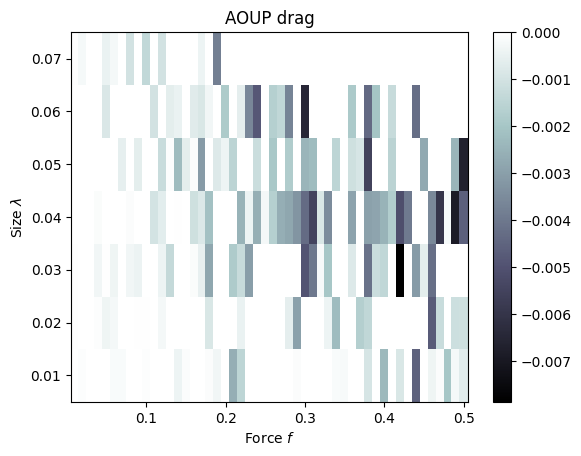

In [8]:
fig, ax = plt.subplots()

c = ax.pcolor(x, y, average, shading="auto",
               norm=Normalize(vmin=average.min(), vmax=0.0), cmap="bone")

fig.colorbar(c, ax=ax)

ax.set_title("AOUP drag")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")

plt.show()

0.0023355522599353387


/tmp/ipykernel_1375411/866805634.py:3: RuntimeWarning: invalid value encountered in divide
  Z = (average - 0) / (std / np.sqrt(sample_size))


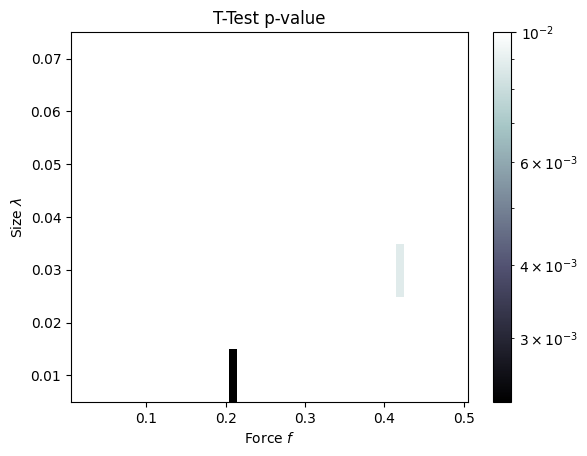

In [9]:
from scipy.stats import norm

Z = (average - 0) / (std / np.sqrt(sample_size))
Z[np.isnan(Z)] = 0.0

p_value = norm.cdf(Z)
print(p_value.min())

fig, ax = plt.subplots()

c = ax.pcolor(x, y, p_value, shading='auto',
               norm=LogNorm(vmin=p_value.min(), vmax=1.e-2), cmap="bone")

fig.colorbar(c, ax=ax)

ax.set_title("T-Test p-value")
ax.set_xlabel(rf"Force $f$")
ax.set_ylabel(rf"Size $\lambda$")

plt.show()